In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

C = 1
svm = svm.SVC(kernel='linear', C=C)
svm.fit(X, y)

SVC(C=1, kernel='linear')

In [3]:
y_pred = svm.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]], dtype=int64)

# Kernel SVM

LinearSVC

In [4]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC(C=C, max_iter=100000)
lsvm.fit(X, y)
y_pred = lsvm.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]], dtype=int64)

LinearSVC 와 SVC(kernel = 'linear') 은 개념의 차이는 없지만, 알고리즘의 차이로 결과 값 차이가 있다.

Radial basis function

In [5]:
from sklearn import svm

rsvm = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=100000)
rsvm.fit(X, y)
y_pred = rsvm.predict(X)
confusion_matrix(y_pred, y)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]], dtype=int64)

Polynomial kernel

In [6]:
psvm = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
psvm.fit(X, y)
y_pred = psvm.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 16, 34]], dtype=int64)

In [7]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [8]:
iris = datasets.load_iris()

X = iris.data[:,:-2]
y = iris.target

In [9]:
C = 1.0

models = (svm.SVC(kernel='linear', C=C),
         svm.LinearSVC(C=C, max_iter=10000),
         svm.SVC(kernel='rbf', gamma=0.7, C=C),
         svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

In [10]:
titles = ('SVC with linear kernel',
         'LinearSVC (linear kernel)',
         'SVC with RBF kernel',
         'SVC with polynomial (degree 3) kernel')

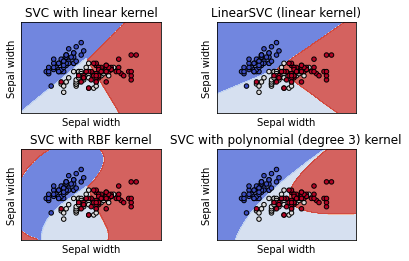

In [11]:
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                 cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolor='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal width')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()